In [110]:
import pandas, numpy, sklearn, seaborn
import matplotlib.pyplot as plt 

In [33]:
filename = "/Users/Yaxuan/Github/stat-215-final/CSpine/CSV datasets/analysisvariables.csv"
av_raw = pandas.read_csv(filename)
av_raw_wo2 = av_raw.loc[:,'SITE':'Clotheslining'].copy()

In [34]:
av_raw_wo2.head(10)

,SITE,CaseID,ControlType,StudySubjectID,AlteredMentalStatus,LOC,ambulatory,FocalNeuroFindings,PainNeck,PosMidNeckTenderness,...,Predisposed,HighriskDiving,HighriskFall,HighriskHanging,HighriskHitByCar,HighriskMVC,HighriskOtherMV,AxialLoadAnyDoc,axialloadtop,Clotheslining
0,1,110001,case,110001,1.0,1.0,0.0,0.0,0.0,0.0,...,0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0.0
1,1,110002,case,110002,0.0,0.0,0.0,0.0,1.0,1.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0
2,1,110003,case,110003,0.0,0.0,NaN,0.0,1.0,1.0,...,0,1.0,0.0,0.0,0.0,0.0,0.0,1,1,0.0
3,1,110004,case,110004,0.0,0.0,1.0,0.0,1.0,1.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.0
4,1,110005,case,110005,NaN,NaN,NaN,0.0,1.0,1.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.0
5,1,110006,case,110006,0.0,1.0,0.0,0.0,1.0,1.0,...,0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.0
6,1,110007,case,110007,0.0,0.0,0.0,1.0,1.0,1.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0
7,1,110008,case,110008,0.0,0.0,1.0,0.0,1.0,1.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.0
8,1,110009,case,110009,0.0,NaN,NaN,0.0,1.0,1.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0
9,1,110010,case,110010,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.0


In [183]:
ob_missing = pandas.DataFrame(av_raw_wo2.groupby('MissingRate').size()/av_raw_wo2.shape[0],
                              columns = ["Proportion"]).reset_index()
ob_missing['cul_prop'] = numpy.cumsum(ob_missing['Proportion'])
ob_missing['MissingCount'] = ob_missing['MissingRate']*21

ob_missing

,MissingRate,Proportion,cul_prop,MissingCount
0,0.000000,0.599276,0.599276,0.0
1,0.047619,0.270368,0.869644,1.0
2,0.095238,0.082076,0.951720,2.0
3,0.142857,0.025649,0.977369,3.0
4,0.190476,0.010561,0.987930,4.0
5,0.238095,0.006337,0.994267,5.0
6,0.285714,0.002716,0.996982,6.0
7,0.333333,0.001509,0.998491,7.0
8,0.380952,0.000604,0.999095,8.0
9,0.428571,0.000604,0.999698,9.0


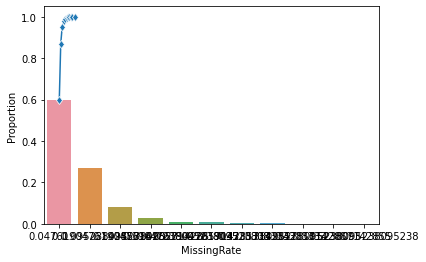

In [184]:
# plots

fig = plt.figure()
sns.lineplot(x = 'MissingRate',y = 'cul_prop', data = ob_missing, marker='d')
sns.barplot(x = 'MissingRate',y = "Proportion", data = ob_missing)
plt.show()

In [60]:
av_delete_n.groupby('MissingRate').size()

MissingRate
0.000000    1986
0.047619     896
0.095238     272
dtype: int64

In [82]:
av_na = av_raw_wo2.copy()
av_na.loc[:,'AlteredMentalStatus':'Clotheslining'] = av_raw_wo2.loc[:,'AlteredMentalStatus':'Clotheslining'].isna()

In [105]:
count_ob = pandas.DataFrame(av_na.groupby(["ControlType", "SITE"]).size(),
                            columns = ["Count"]).reset_index()  

In [112]:
count_ob['SITE'] = count_ob['SITE'].astype(object)

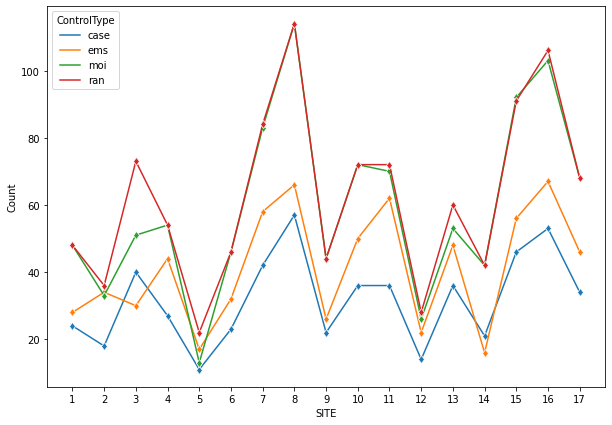

In [136]:
fig = plt.subplots(figsize=(10,7))
seaborn.lineplot(x='SITE', y= 'Count', data=count_ob, hue='ControlType', marker='d')
plt.xticks(np.arange(1, 18, step=1))
plt.show()

In [130]:
av_raw_wo2['MissingNum'] = av_raw_wo2.isna().sum(axis = 1)
av_missing_ob = av_raw_wo2[av_raw_wo2['MissingNum'] > 0]
missing_count = pandas.DataFrame(av_missing_ob.groupby(["ControlType", "SITE"]).size(),
                                 columns = ["Missing"]).reset_index()
missing_count["Rate"] = missing_count["Missing"]/count_ob['Count']

In [131]:
missing_count.head()

,ControlType,SITE,Missing,Rate
0,case,1,10,0.416667
1,case,2,8,0.444444
2,case,3,26,0.650000
3,case,4,5,0.185185
4,case,5,6,0.545455


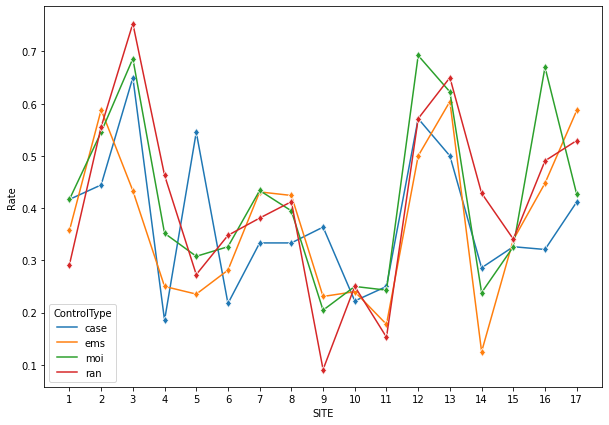

In [138]:
fig, ax1 = plt.subplots(figsize=(10,7))
# sns.barplot(x='yq', y='Value1', data=dataset, hue='Group',ax=ax1)
plt.xticks(np.arange(1, 18, step=1))
sns.lineplot(x = 'SITE',y = 'Rate', data = missing_count, hue='ControlType', marker='d')
plt.show()

In [165]:
av_raw.columns

Index(['SITE', 'CaseID', 'ControlType', 'StudySubjectID',
       'AlteredMentalStatus', 'LOC', 'ambulatory', 'FocalNeuroFindings',
       'PainNeck', 'PosMidNeckTenderness', 'TenderNeck', 'Torticollis',
       'SubInj_Head', 'SubInj_Face', 'SubInj_Ext', 'SubInj_TorsoTrunk',
       'Predisposed', 'HighriskDiving', 'HighriskFall', 'HighriskHanging',
       'HighriskHitByCar', 'HighriskMVC', 'HighriskOtherMV', 'AxialLoadAnyDoc',
       'axialloadtop', 'Clotheslining', 'AlteredMentalStatus2',
       'FocalNeuroFindings2', 'PainNeck2', 'PosMidNeckTenderness2',
       'TenderNeck2', 'Torticollis2', 'subinj_Head2', 'subinj_Face2',
       'subinj_Ext2', 'subinj_TorsoTrunk2'],
      dtype='object')

In [182]:
name_list = ['SITE', 'CaseID', 'ControlType',
    'AlteredMentalStatus','FocalNeuroFindings', 'PainNeck', 'PosMidNeckTenderness',
    'TenderNeck', 'Torticollis', 'subinj_Head', 'subinj_Face','subinj_Ext', 'subinj_TorsoTrunk',
    'AlteredMentalStatus2','FocalNeuroFindings2', 'PainNeck2', 'PosMidNeckTenderness2',
    'TenderNeck2', 'Torticollis2', 'subinj_Head2', 'subinj_Face2','subinj_Ext2', 'subinj_TorsoTrunk2']

In [176]:
av_adjusted_Alt = av_raw[['SITE', 'CaseID', 'ControlType',
    'AlteredMentalStatus', 'AlteredMentalStatus2']]
av_adjusted_Alt = av_adjusted_Alt[av_adjusted_Alt['AlteredMentalStatus2'].notna()]
av_adjusted_Alt = av_adjusted_Alt[av_adjusted_Alt['AlteredMentalStatus'] != av_adjusted_Alt['AlteredMentalStatus2']]

In [181]:
av_adjusted_Alt[av_adjusted_Alt['AlteredMentalStatus'].isna()]

,SITE,CaseID,ControlType,AlteredMentalStatus,AlteredMentalStatus2
896,7,710874,ems,NaN,1.0
916,7,710867,ems,NaN,1.0
1198,8,811153,ems,NaN,1.0
1288,8,811174,moi,NaN,1.0
1289,8,811142,moi,NaN,1.0
1444,8,811146,ran,NaN,1.0
1650,10,1011617,ems,NaN,1.0
1867,11,1111868,case,NaN,1.0
2111,12,1212088,ems,NaN,1.0
2207,13,1312181,ems,NaN,1.0
